In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load dataset hasil ekstraksi
file_path = "./Contoh/Hasil_RGB_ExG_Perlakuan1.xlsx"
df = pd.read_excel(file_path)
df

,R,G,B,Excess Green (ExG)
0,151,149.0,106.40,40.60
1,151,149.0,109.78,37.22
2,149,149.0,106.40,42.60
3,149,149.0,130.06,18.94
4,149,151.4,106.40,47.40
...,...,...,...,...
321,132,137.0,113.16,28.84
322,132,137.0,86.12,55.88
323,132,137.0,113.16,28.84
324,132,137.0,113.16,28.84


In [11]:
# 2. Pisah fitur dan target
X = df[["R", "G", "B"]]
y = df["Excess Green (ExG)"]

In [12]:
# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# 4. Latih model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# 5. Prediksi terhadap data uji
y_pred = model.predict(X_test)

In [15]:
# 6. Hasil prediksi vs aktual
hasil_prediksi = pd.DataFrame({
    "R": X_test["R"].values,
    "G": X_test["G"].values,
    "B": X_test["B"].values,
    "ExG Aktual": y_test.values,
    "ExG Prediksi": y_pred
})

print("\n========== Hasil Prediksi ==========")
print(hasil_prediksi)


========== Hasil Prediksi ==========
      R      G       B  ExG Aktual  ExG Prediksi
0   144  146.6  126.68       22.52         22.52
1   142  144.2  116.54       29.86         29.86
2   144  146.6  103.02       46.18         46.18
3   147  149.0  133.44       17.56         17.56
4   142  144.2  126.68       19.72         19.72
..  ...    ...     ...         ...           ...
93  144  149.0  130.06       23.94         23.94
94  129  134.6  106.40       33.80         33.80
95  147  134.6   86.12       36.08         36.08
96  149  151.4  136.82       16.98         16.98
97  129  137.0   86.12       58.88         58.88

[98 rows x 5 columns]


In [16]:
# 7. Evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
y_test_safe = y_test.replace(0, np.finfo(float).eps)
mape = np.mean(np.abs((y_test_safe - y_pred) / y_test_safe)) * 100

print("\n========== Evaluasi Model ==========")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")
print(f"MAPE : {mape:.2f}%")


========== Evaluasi Model ==========
MAE  : 0.00
MSE  : 0.00
RMSE : 0.00
R²   : 1.0000
MAPE : 0.00%


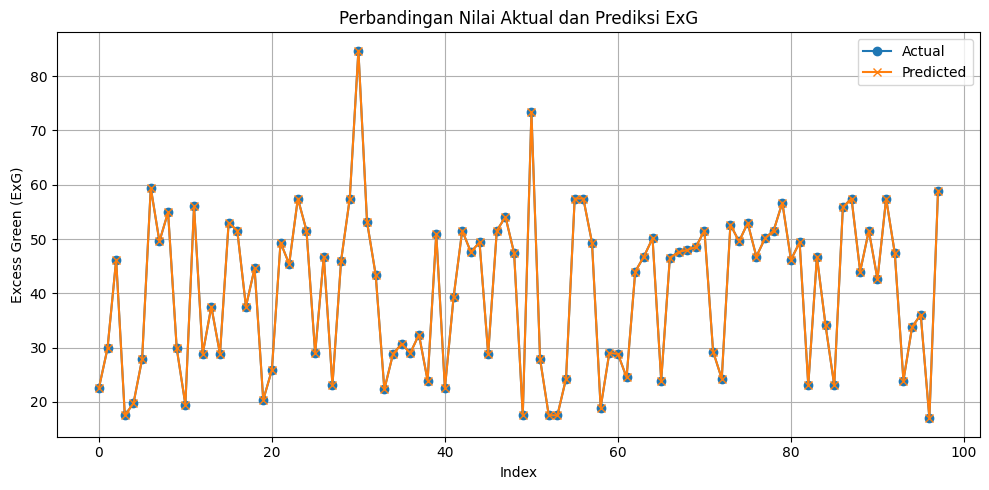

In [17]:
# 8. Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Perbandingan Nilai Aktual dan Prediksi ExG')
plt.xlabel('Index')
plt.ylabel('Excess Green (ExG)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# 9. Simpan model
import joblib
model_filename = "linear_regression_model.pkl"
joblib.dump(model, model_filename)

['linear_regression_model.pkl']